## Análisis de datos - Clase 3

### Codificación (encoding)

In [3]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder, HashingEncoder


In [5]:
# Cargamos el dataset de Titanic de Seaborn
df = sns.load_dataset("titanic")[["sex", "class", "embark_town", "age", "fare", "survived"]].dropna()
df

,sex,class,embark_town,age,fare,survived
0,male,Third,Southampton,22.0,7.2500,0
1,female,First,Cherbourg,38.0,71.2833,1
2,female,Third,Southampton,26.0,7.9250,1
3,female,First,Southampton,35.0,53.1000,1
4,male,Third,Southampton,35.0,8.0500,0
...,...,...,...,...,...,...
885,female,Third,Queenstown,39.0,29.1250,0
886,male,Second,Southampton,27.0,13.0000,0
887,female,First,Southampton,19.0,30.0000,1
889,male,First,Cherbourg,26.0,30.0000,1


#### One-Hot encoding
Crea una columna binaria (0/1) para cada categoría.

In [6]:
# 1. One-Hot Encoding
one_hot = pd.get_dummies(df["sex"], prefix="sex")
df_one_hot = df.join(one_hot) #.drop(columns=["sex"])
df_one_hot.head(10)

,sex,class,embark_town,age,fare,survived,sex_female,sex_male
0,male,Third,Southampton,22.0,7.2500,0,False,True
1,female,First,Cherbourg,38.0,71.2833,1,True,False
2,female,Third,Southampton,26.0,7.9250,1,True,False
3,female,First,Southampton,35.0,53.1000,1,True,False
4,male,Third,Southampton,35.0,8.0500,0,False,True
6,male,First,Southampton,54.0,51.8625,0,False,True
7,male,Third,Southampton,2.0,21.0750,0,False,True
8,female,Third,Southampton,27.0,11.1333,1,True,False
9,female,Second,Cherbourg,14.0,30.0708,1,True,False
10,female,Third,Southampton,4.0,16.7000,1,True,False


#### Ordinal Encoding
Asigna un número entero secuencial a cada categoría.

In [7]:
# 2. Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[["Third", "Second", "First"]])
df["class_encoded"] = ordinal_encoder.fit_transform(df[["class"]]).astype(int)
df.head(10)

,sex,class,embark_town,age,fare,survived,class_encoded
0,male,Third,Southampton,22.0,7.2500,0,0
1,female,First,Cherbourg,38.0,71.2833,1,2
2,female,Third,Southampton,26.0,7.9250,1,0
3,female,First,Southampton,35.0,53.1000,1,2
4,male,Third,Southampton,35.0,8.0500,0,0
6,male,First,Southampton,54.0,51.8625,0,2
7,male,Third,Southampton,2.0,21.0750,0,0
8,female,Third,Southampton,27.0,11.1333,1,0
9,female,Second,Cherbourg,14.0,30.0708,1,1
10,female,Third,Southampton,4.0,16.7000,1,0


#### Target Encoding (Mean encoding)

Reemplaza cada categoría con la media (u otra estadística) de la variable objetivo.

Hace un ajuste en función de la relación entre ambas variables (la que estoy codificando y la variable objetivo).


In [8]:
# 3. Target Encoding

target_encoder = TargetEncoder()
df["embark_town_encoded"] = target_encoder.fit_transform(df["embark_town"], df["survived"])
df.head(10)

,sex,class,embark_town,age,fare,survived,class_encoded,embark_town_encoded
0,male,Third,Southampton,22.0,7.2500,0,0,0.362816
1,female,First,Cherbourg,38.0,71.2833,1,2,0.607689
2,female,Third,Southampton,26.0,7.9250,1,0,0.362816
3,female,First,Southampton,35.0,53.1000,1,2,0.362816
4,male,Third,Southampton,35.0,8.0500,0,0,0.362816
6,male,First,Southampton,54.0,51.8625,0,2,0.362816
7,male,Third,Southampton,2.0,21.0750,0,0,0.362816
8,female,Third,Southampton,27.0,11.1333,1,0,0.362816
9,female,Second,Cherbourg,14.0,30.0708,1,1,0.607689
10,female,Third,Southampton,4.0,16.7000,1,0,0.362816


#### Frequency Encoding
Sustituye cada categoría por su frecuencia de aparición.

In [9]:
# 4. Frequency Encoding
freq_encoding = df["embark_town"].value_counts(normalize=True)
df["embark_town_freq"] = df["embark_town"].map(freq_encoding)
df.head(10)

,sex,class,embark_town,age,fare,survived,class_encoded,embark_town_encoded,embark_town_freq
0,male,Third,Southampton,22.0,7.2500,0,0,0.362816,0.778090
1,female,First,Cherbourg,38.0,71.2833,1,2,0.607689,0.182584
2,female,Third,Southampton,26.0,7.9250,1,0,0.362816,0.778090
3,female,First,Southampton,35.0,53.1000,1,2,0.362816,0.778090
4,male,Third,Southampton,35.0,8.0500,0,0,0.362816,0.778090
6,male,First,Southampton,54.0,51.8625,0,2,0.362816,0.778090
7,male,Third,Southampton,2.0,21.0750,0,0,0.362816,0.778090
8,female,Third,Southampton,27.0,11.1333,1,0,0.362816,0.778090
9,female,Second,Cherbourg,14.0,30.0708,1,1,0.607689,0.182584
10,female,Third,Southampton,4.0,16.7000,1,0,0.362816,0.778090


#### Hashing Encoding
Aplica una función hash para mapear categorías en un número fijo de dimensiones.

In [10]:
# 5. Hashing Encoding
hashing_encoder = HashingEncoder(n_components=4)
hash_encoded = hashing_encoder.fit_transform(df[["embark_town"]])
df = df.join(hash_encoded)
df.head()

,sex,class,embark_town,age,fare,survived,class_encoded,embark_town_encoded,embark_town_freq,col_0,col_1,col_2,col_3
0,male,Third,Southampton,22.0,7.2500,0,0,0.362816,0.778090,0,0,1,0
1,female,First,Cherbourg,38.0,71.2833,1,2,0.607689,0.182584,0,0,0,1
2,female,Third,Southampton,26.0,7.9250,1,0,0.362816,0.778090,0,0,1,0
3,female,First,Southampton,35.0,53.1000,1,2,0.362816,0.778090,0,0,1,0
4,male,Third,Southampton,35.0,8.0500,0,0,0.362816,0.778090,0,0,1,0


#### Cyclic Encoding
Transforma variables cíclicas (como horas del día o meses del año) en coordenadas en un círculo.

In [11]:
# Cargamos el dataset de vuelos (Flights)
flights_df = sns.load_dataset("flights")
flights_df["month_num"] = flights_df["month"].map({
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}).astype(int)
flights_df["date"] = pd.to_datetime(flights_df["year"].astype(str) + '-' + flights_df["month_num"].astype(str), format='%Y-%m')

flights_df.head()

,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01


In [12]:
# 6. Cyclic Encoding

flights_df["month_sin"] = np.sin(2 * np.pi * flights_df["month_num"] / 12)
flights_df["month_cos"] = np.cos(2 * np.pi * flights_df["month_num"] / 12)

flights_df.head(20)

,year,month,passengers,month_num,date,month_sin,month_cos
0,1949,Jan,112,1,1949-01-01,5.000000e-01,8.660254e-01
1,1949,Feb,118,2,1949-02-01,8.660254e-01,5.000000e-01
2,1949,Mar,132,3,1949-03-01,1.000000e+00,6.123234e-17
3,1949,Apr,129,4,1949-04-01,8.660254e-01,-5.000000e-01
4,1949,May,121,5,1949-05-01,5.000000e-01,-8.660254e-01
5,1949,Jun,135,6,1949-06-01,1.224647e-16,-1.000000e+00
6,1949,Jul,148,7,1949-07-01,-5.000000e-01,-8.660254e-01
7,1949,Aug,148,8,1949-08-01,-8.660254e-01,-5.000000e-01
8,1949,Sep,136,9,1949-09-01,-1.000000e+00,-1.836970e-16
9,1949,Oct,119,10,1949-10-01,-8.660254e-01,5.000000e-01


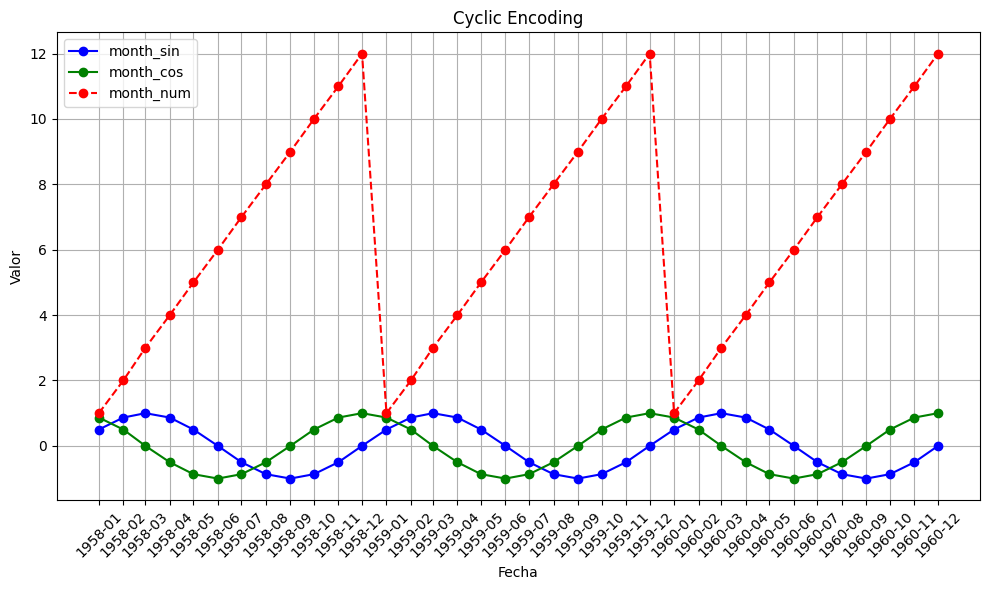

In [13]:
# Gráfico
df = flights_df[flights_df['year']>=1958]

plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["month_sin"], label="month_sin", color='blue', marker='o')
plt.plot(df["date"], df["month_cos"], label="month_cos", color='green', marker='o')
plt.plot(df["date"], df["month_num"], label="month_num", color='red', linestyle='--', marker='o')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Cyclic Encoding")
plt.legend()

# Ajustar las fechas en el eje X para que se vean bien
plt.xticks(df["date"], df["date"].dt.strftime('%Y-%m'), rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()